In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))
tab20 = cm.get_cmap(plt.get_cmap('tab20'))

def tableau20(color):
    # Use coordinated colors. These are the "Tableau 20" colors as
    # RGB. Each pair is strong/light. For a theory of color
    tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
                 (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
                 (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
                 (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
                 (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
                 (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
                 (227, 119, 194), (247, 182, 210), # pink        [12,13]
                 (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
                 (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
                 (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
                 (127, 127, 127), (143, 135, 130), # gray        [20,21]
                 (165, 172, 175), (199, 199, 199), # gray        [22,23]
                 (207, 207, 207)]                   # gray        [24]
    # Scale the RGB values to the [0, 1] range, which is the format
    # matplotlib accepts.
    r, g, b = tableau20[color]
    return (round(r/255.,1), round(g/255.,1), round(b/255.,1))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
#StHomoCampaigns_4DynFixedHomoResources = pd.read_csv('../Data/StHomoCampaigns_4DynFixedHomoResources.csv')

#StHomoCampaigns_4DynFixedHomoResources = StHomoCampaigns_4DynFixedHomoResources.groupby(by=['planner','size'])
#StHomoCampaigns_4DynFixedHomoResources_makespan_means = StHomoCampaigns_4DynFixedHomoResources.mean()
#StHomoCampaigns_4DynFixedHomoResources_makespan_stds = StHomoCampaigns_4DynFixedHomoResources.std()

In [3]:
StHomoCampaigns_4DynHomoResources = pd.read_csv('../Data/StHomoCampaigns_4DynHomoResources.csv')
StHomoCampaigns_4DynHomoResources['mpn_snt_norm'] = StHomoCampaigns_4DynHomoResources['mpn_snt'] / StHomoCampaigns_4DynHomoResources['expected']

In [4]:
StHomoCampaigns_4DynHomoResources = StHomoCampaigns_4DynHomoResources.groupby(by=['planner','size'])
StHomoCampaigns_4DynHomoResources_makespan_means = StHomoCampaigns_4DynHomoResources.mean()
StHomoCampaigns_4DynHomoResources_makespan_stds = StHomoCampaigns_4DynHomoResources.std()

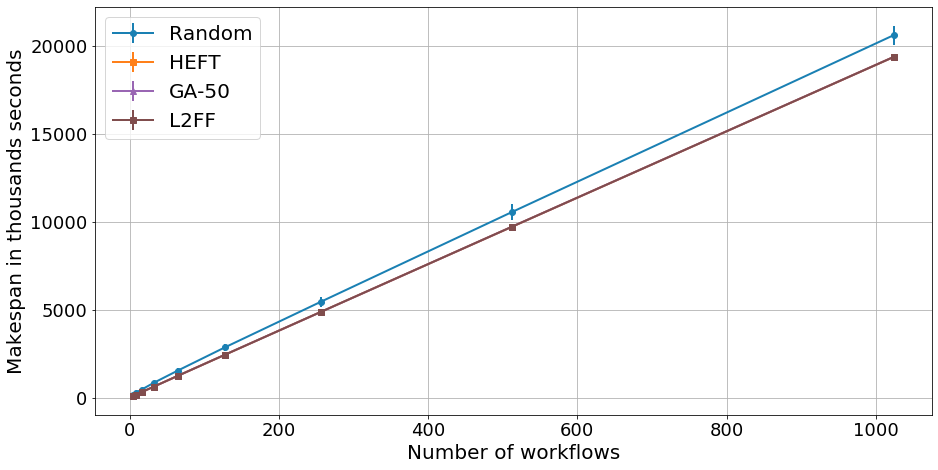

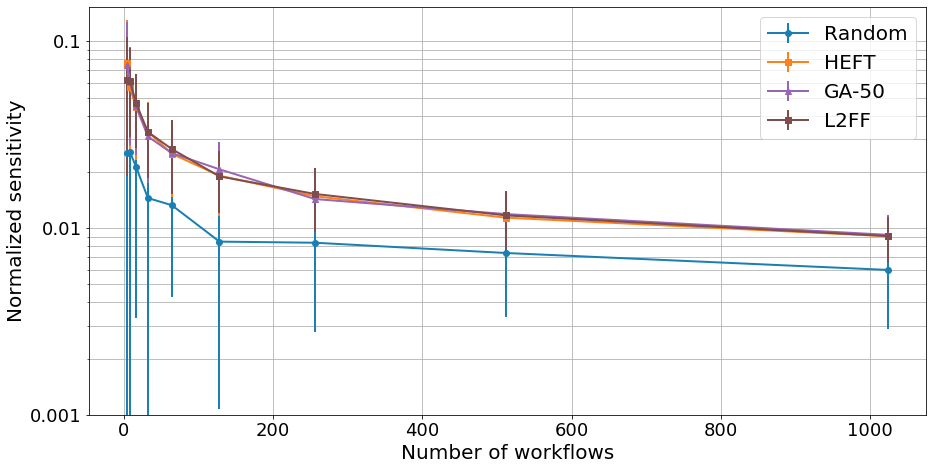

In [5]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('RANDOM')['makespan'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT').index,StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('HEFT')['makespan'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA-50').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA-50')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA-50')['makespan'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF').index,StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
# _ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
#_ = axis.set_title('As a function of the number of workflows', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/StHomoCampaigns_4DynHomoResources.pdf',bbox_inches='tight')
#fig.savefig('StHomoCampaigns_4DyHomoResources.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['mpn_snt_norm'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('RANDOM')['mpn_snt_norm'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT').index,StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['mpn_snt_norm'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('HEFT')['mpn_snt_norm'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA-50').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA-50')['mpn_snt_norm'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA-50')['mpn_snt_norm'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF').index,StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['mpn_snt_norm'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('L2FF')['mpn_snt_norm'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_yticks([0.001,0.01,0.1])
#_ = axis.set_xscale('symlog',basex=2)
_ = axis.set_ylabel('Normalized sensitivity',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks().tolist(),fontsize=18)
_ = axis.grid('on',which='both')
#_ = axis.set_title('As a function of the number of workflows', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/StHomoCampaigns_4DynHomoResourcesSens.pdf',bbox_inches='tight')
#fig.savefig('StHomoCampaigns_4DyHomoResources.pdf',bbox_inches='tight')

In [6]:
#DiffStHomoCamp_4StHomoResHE = abs(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA = abs(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA25 = abs(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA50 = abs(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA-50')['makespan'].values)
#DiffStHomoCamp_4StHomoResL2 = abs(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['makespan'].values)

#DiffStHomoCamp_4StHomoResHEGA = (StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA25 = (StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA50 = (StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA-50')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEL2 = (StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)

#fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(30,7.5), sharex=True)
#fig.subplots_adjust(wspace=0.15, hspace=0.05)
#_ = axis[0].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=tab20(6))
#_ = axis[0].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=tab20(7))
#_ = axis[0].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA25, marker='o',linewidth=2, label='Diff RA - GA-25', color=tab20(8))
#_ = axis[0].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA50, marker='o',linewidth=2, label='Diff RA - GA-50', color=tab20(9))
#_ = axis[0].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResL2, marker='o',linewidth=2, label='Diff RA - L2FF', color=tab20(10))

#_ = axis[1].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=tab20(11))
#_ = axis[1].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA25, marker='o',linewidth=2, label='Diff GA-25 - HEFT', color=tab20(12))
#_ = axis[1].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA50, marker='o',linewidth=2, label='Diff GA-50 - HEFT', color=tab20(13))
#_ = axis[1].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEL2, marker='o',linewidth=2, label='Diff L2FF - HEFT', color=tab20(14))
#_ = axis[1].set_yscale('symlog')
#_ = axis[0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
#_ = axis[0].set_xlabel('Number of workflows',fontsize=20)
#_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
#_ = axis[0].grid('on')
#_ = axis[0].legend(fontsize=20)

#_ = axis[1].set_xlabel('Number of workflows',fontsize=20)
#_ = axis[1].set_xticklabels(axis[1].get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis[1].set_yticklabels((axis[1].get_yticks()/1000).astype('float').tolist(),fontsize=18)
#_ = axis[1].grid('on')
#_ = axis[1].legend(fontsize=20)
#_ = fig.suptitle("Makespan difference between planner's placement of static homogeneous campaigns on dynamic homogeneous resources", fontsize=22)
#fig.savefig('StHomoCampaigns_4StHomoResources_diff.png',bbox_inches='tight')
#fig.savefig('StHomoCampaigns_4StHomoResources_diff.pdf',bbox_inches='tight')

In [7]:
DynHomoResources_StHomoCampaigns = pd.read_csv('../Data/DynHomoResources_StHomoCampaigns.csv')
DynHomoResources_StHomoCampaigns['mpn_snt_norm'] = DynHomoResources_StHomoCampaigns['mpn_snt'] / DynHomoResources_StHomoCampaigns['expected']
DynHomoResources_StHomoCampaigns = DynHomoResources_StHomoCampaigns.groupby(by=['planner','size'])
DynHomoResources_StHomoCampaigns_makespan_means = DynHomoResources_StHomoCampaigns.mean()
DynHomoResources_StHomoCampaigns_makespan_stds = DynHomoResources_StHomoCampaigns.std()

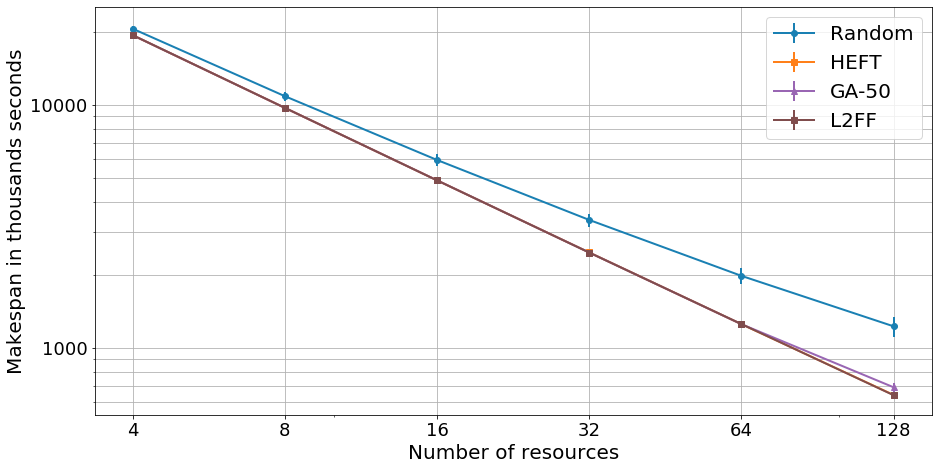

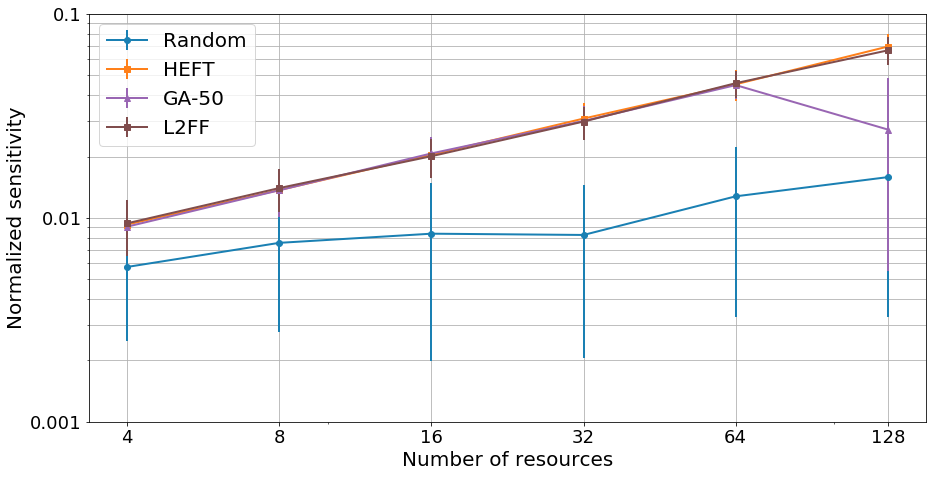

In [8]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM')['makespan'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('HEFT').index,DynHomoResources_StHomoCampaigns_makespan_means.xs('HEFT')['makespan'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('HEFT')['makespan'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('GA').index, DynHomoResources_StHomoCampaigns_makespan_means.xs('GA')['makespan'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-25').index, DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-25')['makespan'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-50').index, DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-50')['makespan'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('L2FF').index,DynHomoResources_StHomoCampaigns_makespan_means.xs('L2FF')['makespan'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog')
#_ = axis.set_ylim([-50,20000])
#_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([4,8,16,32,64,128])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on',which='both', axis='y')
_ = axis.grid('on',which='major', axis='x')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/DynHomoResources_StHomoCampaigns.pdf', bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM')['mpn_snt_norm'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('RANDOM')['mpn_snt_norm'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('HEFT').index,DynHomoResources_StHomoCampaigns_makespan_means.xs('HEFT')['mpn_snt_norm'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('HEFT')['mpn_snt_norm'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('GA').index, DynHomoResources_StHomoCampaigns_makespan_means.xs('GA')['makespan'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-25').index, DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-25')['makespan'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-50').index, DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-50')['mpn_snt_norm'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('GA-50')['mpn_snt_norm'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHomoCampaigns_makespan_means.xs('L2FF').index,DynHomoResources_StHomoCampaigns_makespan_means.xs('L2FF')['mpn_snt_norm'].values,DynHomoResources_StHomoCampaigns_makespan_stds.xs('L2FF')['mpn_snt_norm'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
_ = axis.set_ylabel('Normalized sensitivity',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_yscale('log')
_ = axis.set_yticks([0.001,0.01,0.1])
_ = axis.set_xscale('symlog')
#_ = axis.set_ylim([-50,20000])
#_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([4,8,16,32,64,128])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks().tolist(),fontsize=18)
_ = axis.grid('on',which='both', axis='y')
_ = axis.grid('on',which='major', axis='x')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/DynHomoResources_StHomoCampaignsSens.pdf', bbox_inches='tight')

In [9]:
#DiffStHomoCamp_4StHomoResHE = abs(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM')['makespan'].values - DynHomoResources_StHomoCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA = abs(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM')['makespan'].values - DynHomoResources_StHomoCampaigns_makespan_means.xs('GA')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA25 = abs(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM')['makespan'].values - DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-25')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA50 = abs(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM')['makespan'].values - DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-50')['makespan'].values)
#DiffStHomoCamp_4StHomoResL2 = abs(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM')['makespan'].values - DynHomoResources_StHomoCampaigns_makespan_means.xs('L2FF')['makespan'].values)

#DiffStHomoCamp_4StHomoResHEGA = (DynHomoResources_StHomoCampaigns_makespan_means.xs('GA')['makespan'].values - DynHomoResources_StHomoCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA25 = (DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-25')['makespan'].values - DynHomoResources_StHomoCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA50 = (DynHomoResources_StHomoCampaigns_makespan_means.xs('GA-50')['makespan'].values - DynHomoResources_StHomoCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEL2 = (DynHomoResources_StHomoCampaigns_makespan_means.xs('L2FF')['makespan'].values - DynHomoResources_StHomoCampaigns_makespan_means.xs('HEFT')['makespan'].values)

#fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(30,7.5), sharex=True)
#fig.subplots_adjust(wspace=0.15, hspace=0.05)
#_ = axis[0].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=tab20(6))
#_ = axis[0].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=tab20(7))
#_ = axis[0].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA25, marker='o',linewidth=2, label='Diff RA - GA-25', color=tab20(8))
#_ = axis[0].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA50, marker='o',linewidth=2, label='Diff RA - GA-50', color=tab20(9))
#_ = axis[0].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResL2, marker='o',linewidth=2, label='Diff RA - L2FF', color=tab20(10))

#_ = axis[1].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=tab20(11))
#_ = axis[1].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA25, marker='o',linewidth=2, label='Diff GA-25 - HEFT', color=tab20(12))
#_ = axis[1].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA50, marker='o',linewidth=2, label='Diff GA-50 - HEFT', color=tab20(13))
#_ = axis[1].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEL2, marker='o',linewidth=2, label='Diff L2FF - HEFT', color=tab20(14))
#_ = axis[1].set_yscale('symlog')
#_ = axis[0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
#_ = axis[0].set_xlabel('Number of resources',fontsize=20)
#_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
#_ = axis[0].grid('on')
#_ = axis[0].legend(fontsize=20)

#_ = axis[1].set_xlabel('Number of resources',fontsize=20)
#_ = axis[1].set_xticklabels(axis[1].get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis[1].set_yticklabels((axis[1].get_yticks()/1000).astype('float').tolist(),fontsize=18)
#_ = axis[1].grid('on')
#_ = axis[1].legend(fontsize=20)
#_ = fig.suptitle("Makespan difference between planner's placement of static homogeneous campaigns on dynamic homogeneous resources", fontsize=22)
#fig.savefig('StHomoCampaigns_4StHomoResources_diff.png',bbox_inches='tight')
#fig.savefig('StHomoCampaigns_4StHomoResources_diff.pdf',bbox_inches='tight')

In [10]:
StHeteroCampaigns_4DynHomoResources = pd.read_csv('../Data/StHeteroCampaigns_4DynHomoResources.csv')
StHeteroCampaigns_4DynHomoResources['mpn_snt_norm'] = StHeteroCampaigns_4DynHomoResources['mpn_snt'] / StHeteroCampaigns_4DynHomoResources['expected']
StHeteroCampaigns_4DynHomoResources = StHeteroCampaigns_4DynHomoResources.groupby(by=['planner','size'])
StHeteroCampaigns_4DynHomoResources_makespan_means = StHeteroCampaigns_4DynHomoResources.mean()
StHeteroCampaigns_4DynHomoResources_makespan_stds = StHeteroCampaigns_4DynHomoResources.std()

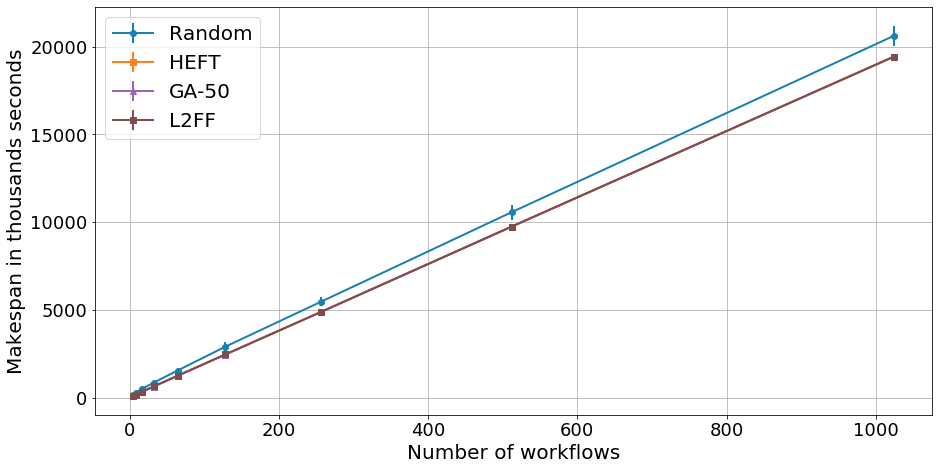

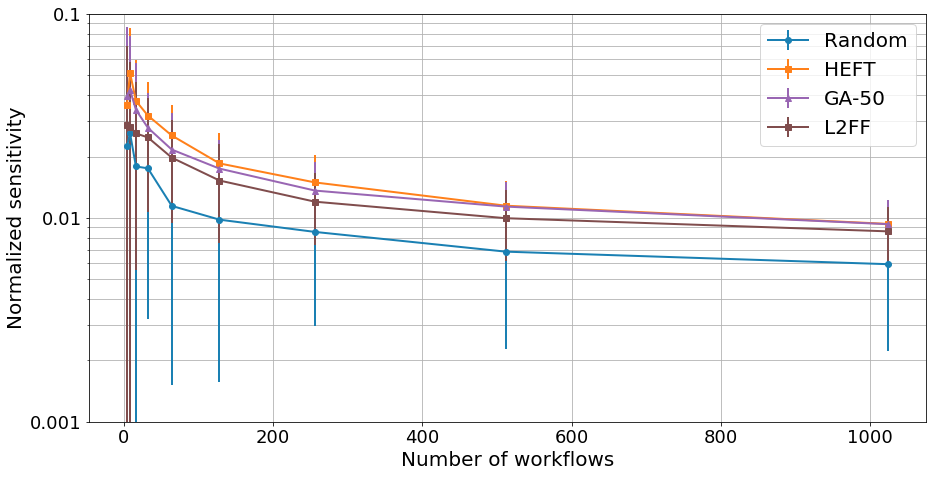

In [11]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('RANDOM')['makespan'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('HEFT')['makespan'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA').index, StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-25').index, StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-25')['makespan'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-50').index, StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-50')['makespan'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('GA-50')['makespan'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('L2FF').index, StHeteroCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['makespan'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
#_ = axis.set_yscale('log')
#_ = axis.set_xscale('symlog')
#_ = axis.set_ylim([-50,20000])
#_ = axis.set_xlim([-50,1050])
_ = axis.set_xticks([0,200,400,600,800,1000])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
#_ = axis.set_title('As a function of the number of workflows', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/StHeteroCampaigns_4DynHomoResources.pdf',bbox_inches='tight')
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['mpn_snt_norm'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('RANDOM')['mpn_snt_norm'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['mpn_snt_norm'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('HEFT')['mpn_snt_norm'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA').index, StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-25').index, StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-25')['makespan'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-50').index, StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-50')['mpn_snt_norm'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('GA-50')['mpn_snt_norm'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('L2FF').index, StHeteroCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['mpn_snt_norm'].values,StHeteroCampaigns_4DynHomoResources_makespan_stds.xs('L2FF')['mpn_snt_norm'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
_ = axis.set_ylabel('Normalized sensitivity',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_yscale('log')
_ = axis.set_yticks([0.001,0.01,0.1])
#_ = axis.set_xscale('symlog')
#_ = axis.set_ylim([-50,20000])
#_ = axis.set_xlim([-50,1050])
_ = axis.set_xticks([0,200,400,600,800,1000])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks().tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of workflows', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/StHeteroCampaigns_4DynHomoResourcesSens.pdf',bbox_inches='tight')

In [12]:
#DiffStHomoCamp_4StHomoResHE = abs(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA = abs(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA25 = abs(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-25')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA50 = abs(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-50')['makespan'].values)
#DiffStHomoCamp_4StHomoResL2 = abs(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHeteroCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['makespan'].values)

#DiffStHomoCamp_4StHomoResHEGA = (StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values - StHeteroCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA25 = (StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-25')['makespan'].values - StHeteroCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA50 = (StHeteroCampaigns_4DynHomoResources_makespan_means.xs('GA-50')['makespan'].values - StHeteroCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEL2 = (StHeteroCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['makespan'].values - StHeteroCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)

#fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(30,7.5), sharex=True)
#fig.subplots_adjust(wspace=0.15, hspace=0.05)
#_ = axis[0].plot(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=tab20(6))
#_ = axis[0].plot(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=tab20(7))
#_ = axis[0].plot(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA25, marker='o',linewidth=2, label='Diff RA - GA-25', color=tab20(8))
#_ = axis[0].plot(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA50, marker='o',linewidth=2, label='Diff RA - GA-50', color=tab20(9))
#_ = axis[0].plot(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResL2, marker='o',linewidth=2, label='Diff RA - L2FF', color=tab20(10))

#_ = axis[1].plot(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=tab20(11))
#_ = axis[1].plot(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA25, marker='o',linewidth=2, label='Diff GA-25 - HEFT', color=tab20(12))
#_ = axis[1].plot(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA50, marker='o',linewidth=2, label='Diff GA-50 - HEFT', color=tab20(13))
#_ = axis[1].plot(StHeteroCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEL2, marker='o',linewidth=2, label='Diff L2FF - HEFT', color=tab20(14))
#_ = axis[1].set_yscale('symlog')
#_ = axis[0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
#_ = axis[0].set_xlabel('Number of workflows',fontsize=20)
#_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
#_ = axis[0].grid('on')
#_ = axis[0].legend(fontsize=20)

#_ = axis[1].set_xlabel('Number of workflows',fontsize=20)
#_ = axis[1].set_xticklabels(axis[1].get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis[1].set_yticklabels((axis[1].get_yticks()/1000).astype('float').tolist(),fontsize=18)
#_ = axis[1].grid('on')
#_ = axis[1].legend(fontsize=20)
#_ = fig.suptitle("Makespan difference between planner's placement of static heterogeneous campaigns on dynamic homogeneous resources", fontsize=22)

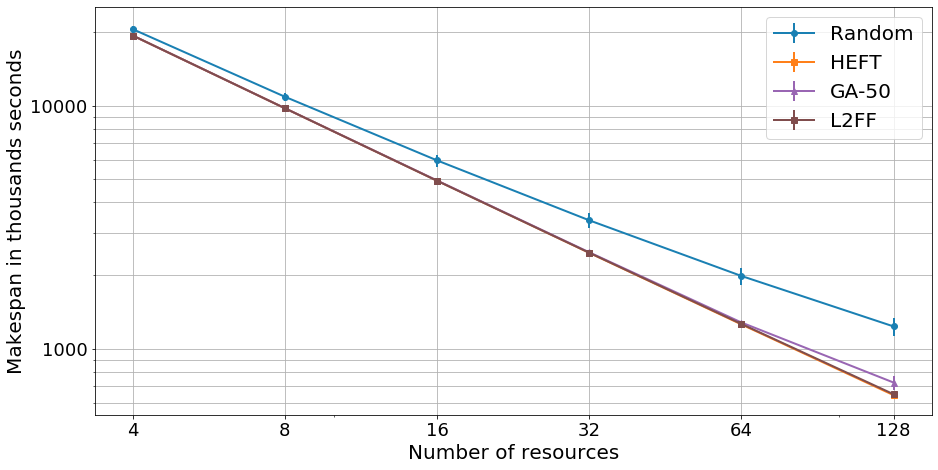

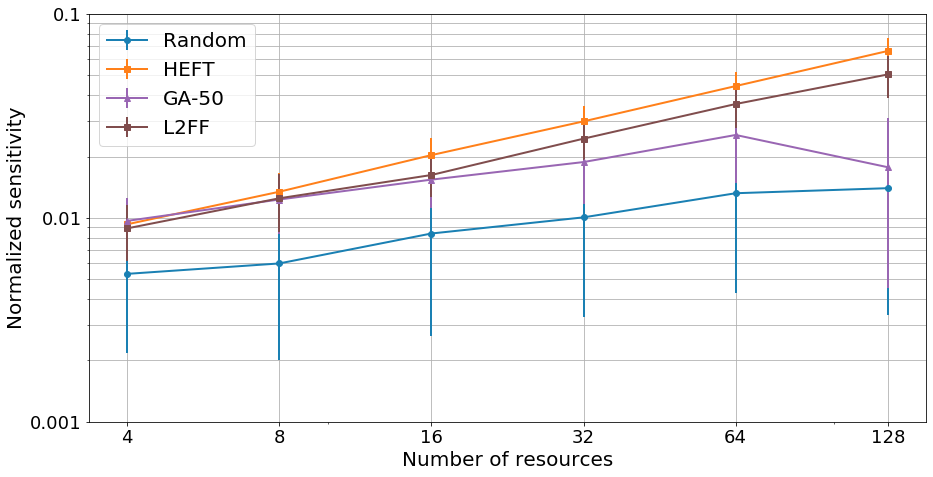

In [13]:
DynHomoResources_StHeteroCampaigns = pd.read_csv('../Data/DynHomoResources_StHeteroCampaigns.csv')
DynHomoResources_StHeteroCampaigns['mpn_snt_norm'] = DynHomoResources_StHeteroCampaigns['mpn_snt'] / DynHomoResources_StHeteroCampaigns['expected']
DynHomoResources_StHeteroCampaigns = DynHomoResources_StHeteroCampaigns.groupby(by=['planner','size'])
DynHomoResources_StHeteroCampaigns_makespan_means = DynHomoResources_StHeteroCampaigns.mean()
DynHomoResources_StHeteroCampaigns_makespan_stds = DynHomoResources_StHeteroCampaigns.std()

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DynHomoResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('HEFT').index,DynHomoResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('HEFT')['makespan'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA').index, DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-25').index, DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-25')['makespan'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-50')['makespan'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('L2FF').index, DynHomoResources_StHeteroCampaigns_makespan_means.xs('L2FF')['makespan'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog')
#_ = axis.set_ylim([-50,20000])
#_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([4,8,16,32,64,128])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on',which='both', axis='y')
_ = axis.grid('on',which='major', axis='x')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/DynHomoResources_StHeteroCampaigns.pdf', bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DynHomoResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['mpn_snt_norm'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('RANDOM')['mpn_snt_norm'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('HEFT').index,DynHomoResources_StHeteroCampaigns_makespan_means.xs('HEFT')['mpn_snt_norm'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('HEFT')['mpn_snt_norm'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA').index, DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-25').index, DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-25')['makespan'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-50')['mpn_snt_norm'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('GA-50')['mpn_snt_norm'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(DynHomoResources_StHeteroCampaigns_makespan_means.xs('L2FF').index, DynHomoResources_StHeteroCampaigns_makespan_means.xs('L2FF')['mpn_snt_norm'].values,DynHomoResources_StHeteroCampaigns_makespan_stds.xs('L2FF')['mpn_snt_norm'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
#_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_ylabel('Normalized sensitivity',fontsize=20)
_ = axis.set_yscale('log')
_ = axis.set_yticks([0.001,0.01,0.1])
_ = axis.set_xscale('symlog')
#_ = axis.set_ylim([-50,20000])
#_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([4,8,16,32,64,128])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks().tolist(),fontsize=18)
_ = axis.grid('on',which='both', axis='y')
_ = axis.grid('on',which='major', axis='x')
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/DynHomoResources_StHeteroCampaignsSens.pdf', bbox_inches='tight')

In [23]:
DynHomoResources_StHeteroCampaigns_makespan_stds['mpn_snt_norm'] / DynHomoResources_StHeteroCampaigns_makespan_means['mpn_snt_norm']

planner  size
GA-50    4       0.292815
         8       0.326133
         16      0.273597
         32      0.380300
         64      0.416958
         128     0.745367
HEFT     4       0.293608
         8       0.237476
         16      0.214488
         32      0.187709
         64      0.165995
         128     0.163755
L2FF     4       0.306459
         8       0.313186
         16      0.220684
         32      0.211708
         64      0.240629
         128     0.232419
RANDOM   4       0.592563
         8       0.663257
         16      0.684872
         32      0.676953
         64      0.674609
         128     0.762283
Name: mpn_snt_norm, dtype: float64

In [15]:
#DiffStHomoCamp_4StHomoResHE = abs(DynHomoResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - DynHomoResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA = abs(DynHomoResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA25 = abs(DynHomoResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-25')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA50 = abs(DynHomoResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-50')['makespan'].values)
#DiffStHomoCamp_4StHomoResL2 = abs(DynHomoResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - DynHomoResources_StHeteroCampaigns_makespan_means.xs('L2FF')['makespan'].values)

#DiffStHomoCamp_4StHomoResHEGA = (DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values - DynHomoResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA25 = (DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-25')['makespan'].values - DynHomoResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA50 = (DynHomoResources_StHeteroCampaigns_makespan_means.xs('GA-50')['makespan'].values - DynHomoResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEL2 = (DynHomoResources_StHeteroCampaigns_makespan_means.xs('L2FF')['makespan'].values - DynHomoResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)

#fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(30,7.5), sharex=True)
#fig.subplots_adjust(wspace=0.15, hspace=0.05)
#_ = axis[0].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=tab20(6))
#_ = axis[0].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=tab20(7))
#_ = axis[0].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA25, marker='o',linewidth=2, label='Diff RA - GA-25', color=tab20(8))
#_ = axis[0].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA50, marker='o',linewidth=2, label='Diff RA - GA-50', color=tab20(9))
#_ = axis[0].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResL2, marker='o',linewidth=2, label='Diff RA - L2FF', color=tab20(10))

#_ = axis[1].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=tab20(11))
#_ = axis[1].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA25, marker='o',linewidth=2, label='Diff GA-25 - HEFT', color=tab20(12))
#_ = axis[1].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA50, marker='o',linewidth=2, label='Diff GA-50 - HEFT', color=tab20(13))
#_ = axis[1].plot(DynHomoResources_StHomoCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEL2, marker='o',linewidth=2, label='Diff L2FF - HEFT', color=tab20(14))
#_ = axis[1].set_yscale('symlog')
#_ = axis[0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
#_ = axis[0].set_xlabel('Number of resources',fontsize=20)
#_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
#_ = axis[0].grid('on')
#_ = axis[0].legend(fontsize=20)

#_ = axis[1].set_xlabel('Number of resources',fontsize=20)
#_ = axis[1].set_xticklabels(axis[1].get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis[1].set_yticklabels((axis[1].get_yticks()/1000).astype('float').tolist(),fontsize=18)
#_ = axis[1].grid('on')
#_ = axis[1].legend(fontsize=20)
#_ = fig.suptitle("Makespan difference between planner's placement of static heterogeneous campaigns on dynamic homogeneous resources", fontsize=22)

In [16]:
StHeteroCampaigns_4DynHeteroResources = pd.read_csv('../Data/StHeteroCampaigns_4DynHeteroResources.csv')
StHeteroCampaigns_4DynHeteroResources['mpn_snt_norm'] = StHeteroCampaigns_4DynHeteroResources['mpn_snt'] / StHeteroCampaigns_4DynHeteroResources['expected'] 
StHeteroCampaigns_4DynHeteroResources = StHeteroCampaigns_4DynHeteroResources.groupby(by=['planner','size'])
StHeteroCampaigns_4DynHeteroResources_makespan_means = StHeteroCampaigns_4DynHeteroResources.mean()
StHeteroCampaigns_4DynHeteroResources_makespan_stds = StHeteroCampaigns_4DynHeteroResources.std()

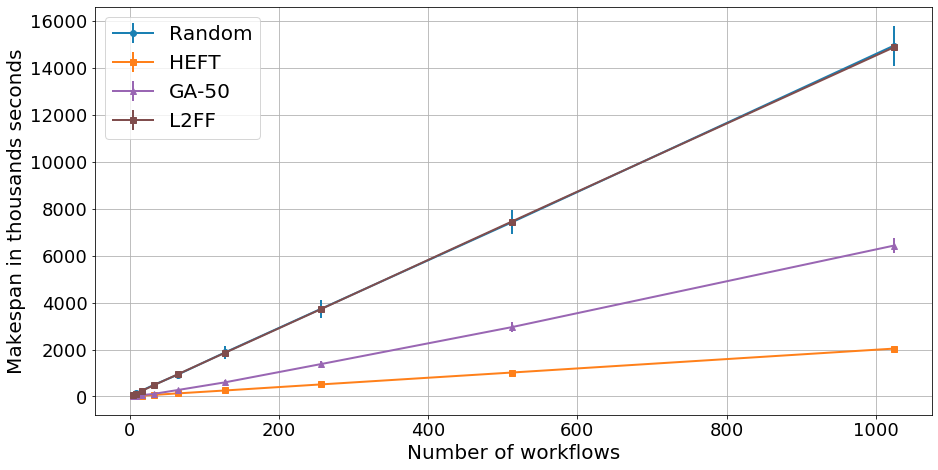

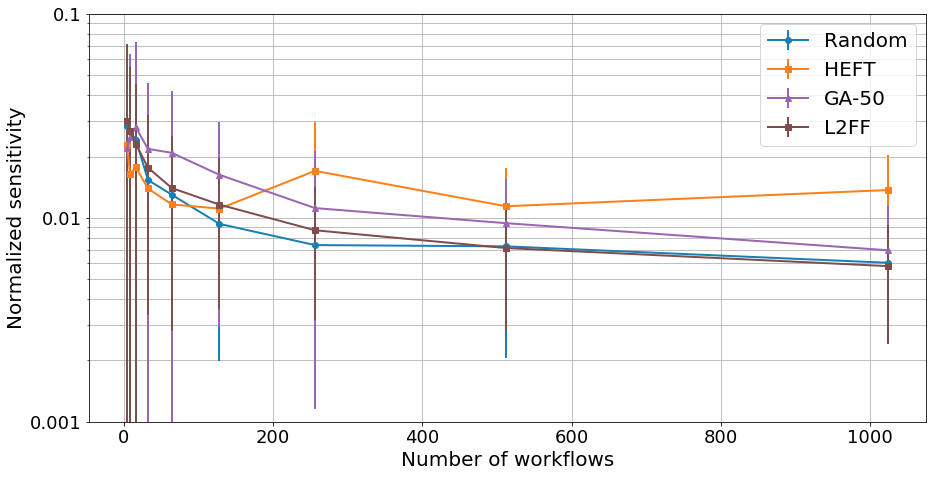

In [17]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('RANDOM').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('RANDOM')['makespan'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('RANDOM')['makespan'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('HEFT')['makespan'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('HEFT')['makespan'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-25').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-25')['makespan'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-50').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-50')['makespan'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('GA-50')['makespan'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('L2FF').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('L2FF')['makespan'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
#_ = axis.set_xticks([0,200,400,600,800,1000])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
#_ = axis.set_title('As a function of the number of workflows', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/StHeteroCampaigns_4DynHeteroResources.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('RANDOM').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('RANDOM')['mpn_snt_norm'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('RANDOM')['mpn_snt_norm'].values, color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('HEFT').index,StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('HEFT')['mpn_snt_norm'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('HEFT')['mpn_snt_norm'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-25').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-25')['makespan'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-50').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-50')['mpn_snt_norm'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('GA-50')['mpn_snt_norm'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('L2FF').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('L2FF')['mpn_snt_norm'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('L2FF')['mpn_snt_norm'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
_ = axis.set_ylabel('Normalized sensitivity',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
#_ = axis.set_xticks([0,200,400,600,800,1000])
_=axis.set_yscale('log')
_ = axis.set_yticks([0.001,0.01,0.1])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks().tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('As a function of the number of workflows', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/StHeteroCampaigns_4DynHeteroResourcesSens.pdf',bbox_inches='tight')

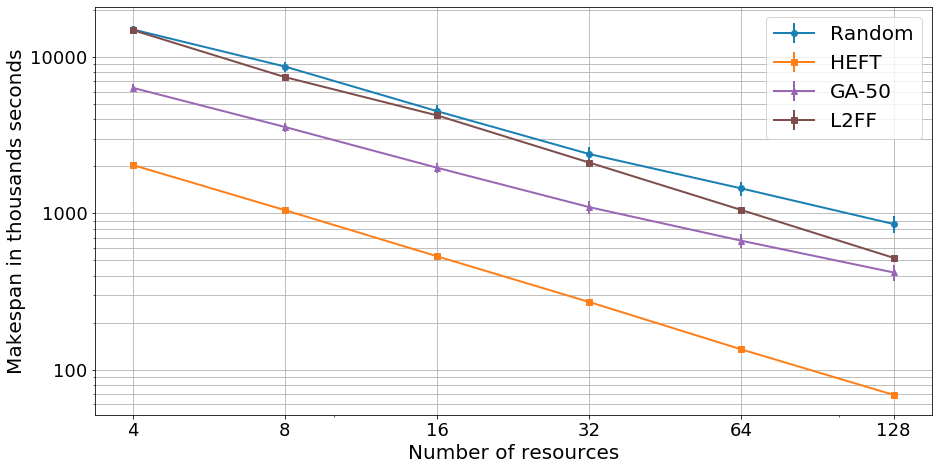

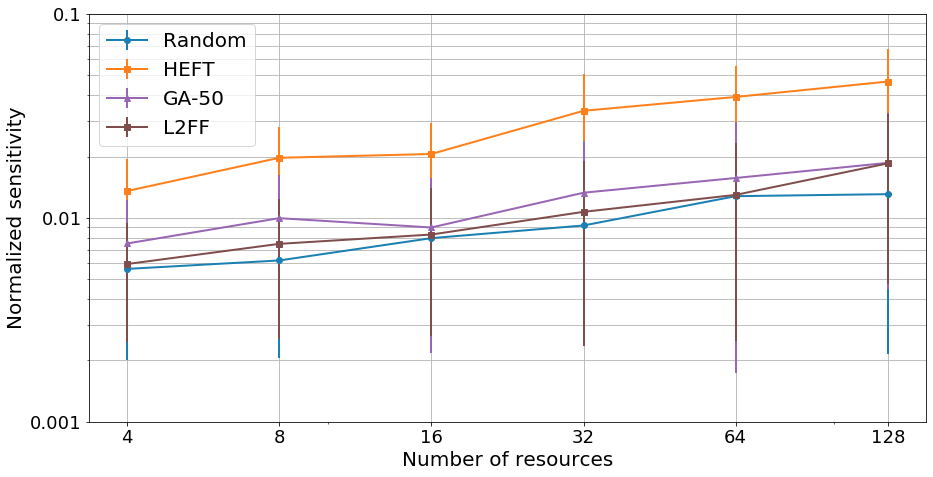

In [18]:
DynHeteroResources_StHeteroCampaigns = pd.read_csv('../Data/DynHeteroResources_StHeteroCampaigns.csv')
DynHeteroResources_StHeteroCampaigns['mpn_snt_norm'] = DynHeteroResources_StHeteroCampaigns['mpn_snt'] / DynHeteroResources_StHeteroCampaigns['expected']  
DynHeteroResources_StHeteroCampaigns = DynHeteroResources_StHeteroCampaigns.groupby(by=['planner','size'])
DynHeteroResources_StHeteroCampaigns_makespan_means = DynHeteroResources_StHeteroCampaigns.mean()
DynHeteroResources_StHeteroCampaigns_makespan_stds = DynHeteroResources_StHeteroCampaigns.std()

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'],DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('RANDOM')['makespan'], color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT').index,DynHeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('HEFT')['makespan'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-25').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-25')['makespan'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50')['makespan'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('L2FF').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('L2FF')['makespan'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog')
#_ = axis.set_ylim([-50,20000])
#_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([4,8,16,32,64,128])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on',which='both', axis='y')
_ = axis.grid('on',which='major', axis='x')
_ = axis.legend(fontsize=20)
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = fig.savefig('../Figures/DynHeteroResources_StHeteroCampaigns.pdf', bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['mpn_snt_norm'],DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('RANDOM')['mpn_snt_norm'], color=tableau20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT').index,DynHeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['mpn_snt_norm'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('HEFT')['mpn_snt_norm'].values, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-25').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-25')['makespan'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50')['mpn_snt_norm'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('GA-50')['mpn_snt_norm'].values, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('L2FF').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('L2FF')['mpn_snt_norm'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('L2FF')['mpn_snt_norm'].values,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
_ = axis.set_ylabel('Normalized sensitivity',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog')
#_ = axis.set_ylim([-50,20000])
#_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([4,8,16,32,64,128])
_ = axis.set_yticks([0.001,0.01,0.1])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks().tolist(),fontsize=18)
_ = axis.grid('on',which='both', axis='y')
_ = axis.grid('on',which='major', axis='x')
_ = axis.legend(fontsize=20)
#_ = axis.set_title('As a function of the number of resources', fontsize=22)
_ = fig.savefig('../Figures/DynHeteroResources_StHeteroCampaignsSens.pdf', bbox_inches='tight')

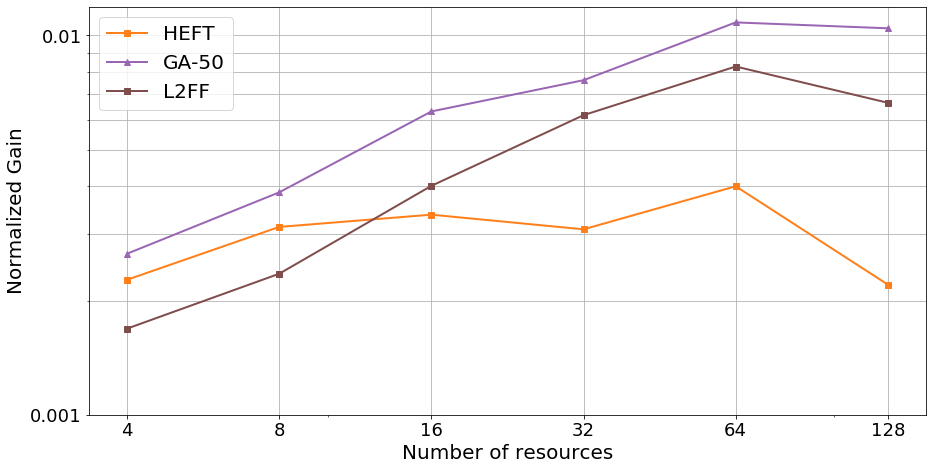

In [19]:
gain_heft = (DynHeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'] - DynHeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['reactive']) / DynHeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan']
gain_ga50 = (DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50')['makespan'] - DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50')['reactive']) / DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50')['makespan']
gain_l2ff = (DynHeteroResources_StHeteroCampaigns_makespan_means.xs('L2FF')['makespan'] - DynHeteroResources_StHeteroCampaigns_makespan_means.xs('L2FF')['reactive']) / DynHeteroResources_StHeteroCampaigns_makespan_means.xs('L2FF')['makespan']

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT').index, gain_heft, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-25').index, DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-25')['makespan'].values,DynHeteroResources_StHeteroCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, gain_ga50, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(DynHeteroResources_StHeteroCampaigns_makespan_means.xs('L2FF').index, gain_l2ff,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
_ = axis.set_ylabel('Normalized Gain',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_yscale('log')
_ = axis.set_xscale('symlog')
#_ = axis.set_ylim([-50,20000])
#_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([4,8,16,32,64,128])
_ = axis.set_yticks([0.001, 0.01])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks().tolist(),fontsize=18)
_ = axis.grid('on',which='both', axis='y')
_ = axis.grid('on',which='major', axis='x')
_ = axis.legend(fontsize=20)
#_ = axis.set_title('Performance gain as a function of the number of resources', fontsize=22)
_ = fig.savefig('../Figures/DynHeteroResources_StHeteroCampaignsGain.pdf', bbox_inches='tight')

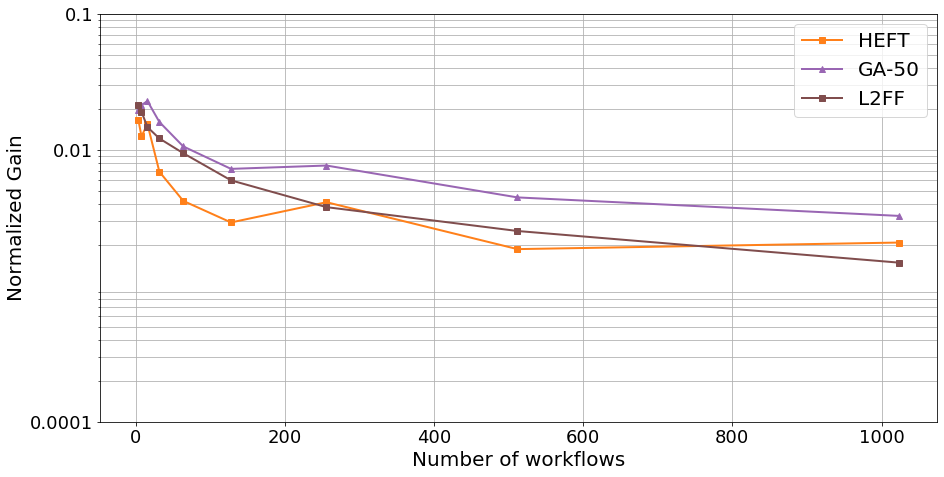

In [20]:
gain_heft = (StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('HEFT')['makespan'] - StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('HEFT')['reactive']) / StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('HEFT')['makespan']
gain_ga50 = (StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-50')['makespan'] - StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-50')['reactive']) / StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-50')['makespan']
gain_l2ff = (StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('L2FF')['makespan'] - StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('L2FF')['reactive']) / StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('L2FF')['makespan']

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('HEFT').index, gain_heft, marker='s',label='HEFT', color=tableau20(2),linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA')['makespan'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('GA')['makespan'].values, color=tableau20(4),marker='^',label='GA',linewidth=2)
#_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-25').index, StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-25')['makespan'].values,StHeteroCampaigns_4DynHeteroResources_makespan_stds.xs('GA-25')['makespan'].values, color=tableau20(6),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('GA-50').index, gain_ga50, color=tableau20(8),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHeteroCampaigns_4DynHeteroResources_makespan_means.xs('L2FF').index, gain_l2ff,marker='s',label='L2FF', color=tableau20(10),linewidth=2)
_ = axis.set_ylabel('Normalized Gain',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticks([0,200,400,600,800,1000])
_ = axis.set_yscale('log')
_ = axis.set_yticks([0.0001, 0.01, 0.1])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels(axis.get_yticks().tolist(),fontsize=18)
_ = axis.grid('on', which='both')
#_ = axis.set_title('Performance gain as a function of the number of workflows', fontsize=22)
_ = axis.legend(fontsize=20)
_ = fig.savefig('../Figures/StHeteroCampaigns_4DynHeteroResourcesGain.pdf',bbox_inches='tight')